<a href="https://colab.research.google.com/github/Josh413/Forecasting-Models-UConn-Research-2025-/blob/main/ML_Project%5BWINDSPEED%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0]	Test-rmse:3.74641
[10]	Test-rmse:2.39176
[20]	Test-rmse:1.66637
[30]	Test-rmse:1.26400
[40]	Test-rmse:1.04241
[50]	Test-rmse:0.93351
[60]	Test-rmse:0.88058
[70]	Test-rmse:0.84450
[80]	Test-rmse:0.82123
[90]	Test-rmse:0.80797
[100]	Test-rmse:0.79822
[110]	Test-rmse:0.78721
[120]	Test-rmse:0.77942
[130]	Test-rmse:0.77330
[140]	Test-rmse:0.76841
[150]	Test-rmse:0.76507
[160]	Test-rmse:0.76056
[170]	Test-rmse:0.76298
[180]	Test-rmse:0.75943
[190]	Test-rmse:0.75594
[200]	Test-rmse:0.75783
[210]	Test-rmse:0.75944
[220]	Test-rmse:0.75675
[230]	Test-rmse:0.75627
[240]	Test-rmse:0.75390
[250]	Test-rmse:0.75320
[260]	Test-rmse:0.75221
[270]	Test-rmse:0.75160
[280]	Test-rmse:0.75152
[290]	Test-rmse:0.75237
[300]	Test-rmse:0.75020
[310]	Test-rmse:0.74951
[320]	Test-rmse:0.74736
[330]	Test-rmse:0.74705
[340]	Test-rmse:0.74914
[350]	Test-rmse:0.74962
[360]	Test-rmse:0.75407
[370]	Test-rmse:0.75770
[380]	Test-rmse:0.75632
[390]	Test-rmse:0.75543
[400]	Test-rmse:0.75870
[410]	Test-rmse:0.75615
[42

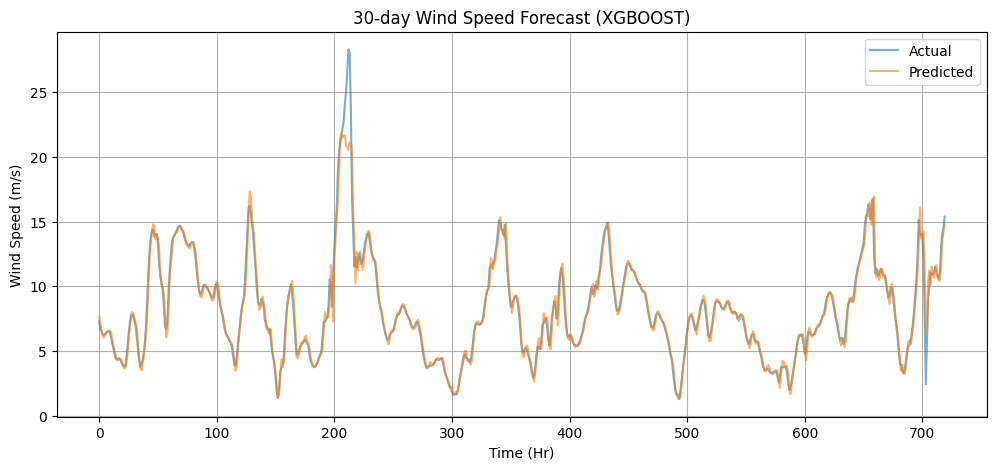

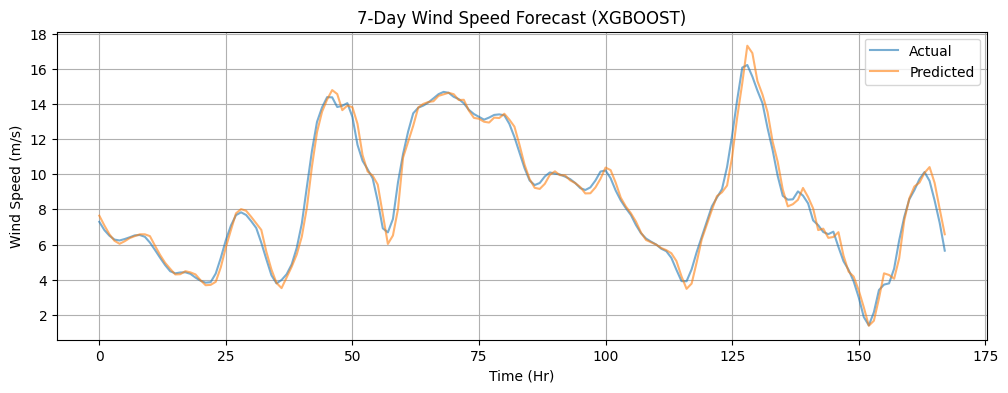

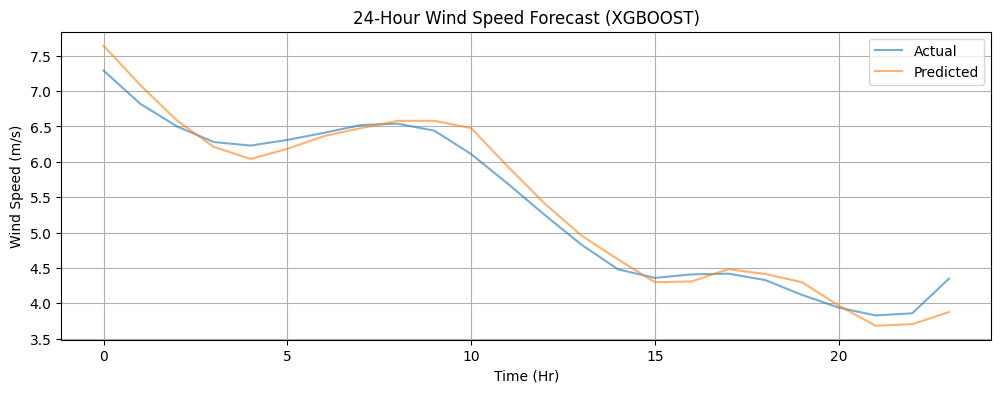

*Actual wind speed data from 2024-12-03 00:00:00
RMSE:  0.763  m/s
MAPE: 5.07%


In [1]:
#XGBOOST MODEL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

df = pd.read_csv('CapeCodWind.csv', skiprows=8, header=1)
df['Time Stamp'] = pd.to_datetime(
    df[['YEAR','MO','DY','HR']].rename(
        columns={'YEAR':'year','MO':'month','DY':'day','HR':'hour'}))
df = df.set_index('Time Stamp')
df = df.rename(columns={'WS50M':'wind'})

lags = [1, 2, 3, 6, 12, 24, 48, 72]
for lag in lags:
    df[f'wind_lag_{lag}'] = df['wind'].shift(lag)

df['hour_sin'] = np.sin(2 * np.pi * df.index.hour / 24)
df['hour_cos'] = np.cos(2 * np.pi * df.index.hour / 24)
df['doy_sin']  = np.sin(2 * np.pi * df.index.dayofyear / 365)
df['doy_cos']  = np.cos(2 * np.pi * df.index.dayofyear / 365)

df = df.dropna()

n_test = 30 * 24  # last 30 days for test
train_df = df.iloc[:-n_test]
test_df  = df.iloc[-n_test:]

X_train = train_df.drop(columns=['wind'])
y_train = train_df['wind']
X_test  = test_df.drop(columns=['wind'])
y_test  = test_df['wind']

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

model_xgb = xgb.train(
    params,
    dtrain,
    num_boost_round=5000,
    evals=[(dtest, "Test")],
    early_stopping_rounds=200,
    verbose_eval=10
)

y_pred = model_xgb.predict(dtest)

plt.figure(figsize=(12,5))
plt.plot(y_test.values,    label='Actual', alpha=0.6)
plt.plot(y_pred,           label='Predicted', alpha=0.6)
plt.title('30-day Wind Speed Forecast (XGBOOST)')
plt.xlabel('Time (Hr)')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(y_test.values[:24*7], label='Actual', alpha=0.6)
plt.plot(y_pred[:24*7],        label='Predicted',             alpha=0.6)
plt.title('7-Day Wind Speed Forecast (XGBOOST)')
plt.xlabel('Time (Hr)')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(y_test.values[:24], label='Actual', alpha=0.6)
plt.plot(y_pred[:24],        label='Predicted',             alpha=0.6)
plt.title('24-Hour Wind Speed Forecast (XGBOOST)')
plt.xlabel('Time (Hr)')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid()
plt.show()

test_start_index = len(df) - len(y_test)
print(f'*Actual wind speed data from {df.index[test_start_index]}')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f'RMSE:  {rmse:.3f}  m/s')
print(f'MAPE: {mape:.2f}%')



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 72, 16)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 72, 16)    │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 72, 16)    │      8,592 │ add[0][0],        │
│ (MultiHeadAttentio… │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 72, 16)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 72, 16)    │          0 │ add[0][0],        │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 72, 16)    │         32 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 72, 64)    │      1,088 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 72, 16)    │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 72, 16)    │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 72, 16)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 72, 16)    │         32 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 72, 16)    │      8,592 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 72, 16)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 72, 16)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 72, 16)    │         32 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 72, 64)    │      1,088 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 72, 16)    │      1,040 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 72, 16)    │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 72, 16)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 72, 16)    │         32 │ add_4[0][0]     

 Total params: 52,376 (204.59 KB)

 Trainable params: 52,376 (204.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
1209/1209 - 130s - 108ms/step - loss: 12.8416 - val_loss: 9.0453
Epoch 2/5000
1209/1209 - 133s - 110ms/step - loss: 7.2030 - val_loss: 4.2057
Epoch 3/5000
1209/1209 - 140s - 116ms/step - loss: 6.8050 - val_loss: 4.7337
Epoch 4/5000
1209/1209 - 142s - 117ms/step - loss: 6.1785 - val_loss: 4.0587
Epoch 5/5000
1209/1209 - 146s - 121ms/step - loss: 5.7894 - val_loss: 3.9276
Epoch 6/5000
1209/1209 - 108s - 89ms/step - loss: 5.6939 - val_loss: 4.0709
Epoch 7/5000
1209/1209 - 108s - 89ms/step - loss: 5.6921 - val_loss: 3.7988
Epoch 8/5000
1209/1209 - 109s - 90ms/step - loss: 5.6453 - val_loss: 3.8000
Epoch 9/5000
1209/1209 - 143s - 118ms/step - loss: 5.5624 - val_loss: 4.0080
Epoch 10/5000
1209/1209 - 140s - 115ms/step - loss: 5.3942 - val_loss: 3.6471
Epoch 11/5000
1209/1209 - 138s - 114ms/step - loss: 3.9660 - val_loss: 2.7505
Epoch 12/5000
1209/1209 - 143s - 118ms/step - loss: 3.4333 - val_loss: 2.3668
Epoch 13/5000
1209/1209 - 140s - 116ms/step - loss: 3.2841 - val_loss: 2.30

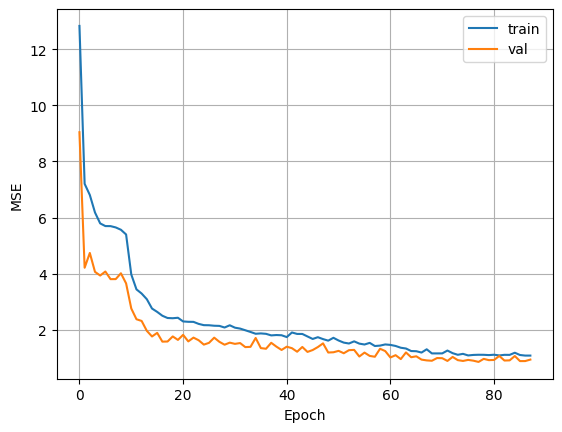

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step


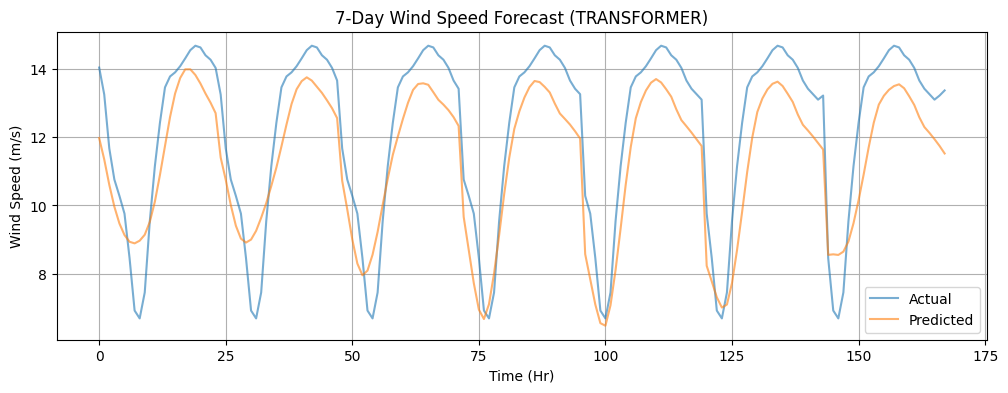

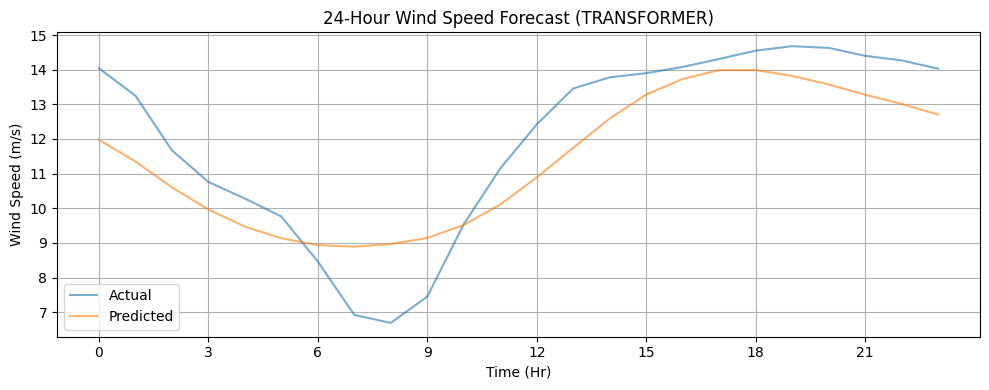

*Actual wind speed data from 2024-12-06 23:00:00
RMSE:  0.905 m/s
MAPE: 8.20%


In [2]:
#TRANSFORMER MODEL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, LayerNormalization, Dropout,
    MultiHeadAttention, Add, Embedding, Flatten, Lambda
)
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import tensorflow.keras.backend as K

df = pd.read_csv('CapeCodWind.csv', skiprows=8, header=1)
df['Time Stamp'] = pd.to_datetime(
    df[['YEAR','MO','DY','HR']].rename(
        columns={'YEAR':'year','MO':'month','DY':'day','HR':'hour'}))
df = df.set_index('Time Stamp').rename(columns={'WS50M':'wind'})

lags = [1,2,3,6,12,24,48,72]
for lag in lags:
    df[f'wind_lag_{lag}'] = df['wind'].shift(lag)
df['hour_sin'] = np.sin(2*np.pi * df.index.hour/24)
df['hour_cos'] = np.cos(2*np.pi * df.index.hour/24)
df['doy_sin']  = np.sin(2*np.pi * df.index.dayofyear/365)
df['doy_cos']  = np.cos(2*np.pi * df.index.dayofyear/365)

df = df.dropna()

n_test = 30*24
train_df = df.iloc[:-n_test]
test_df  = df.iloc[-n_test:]

FEATURE_COLS = [c for c in df.columns if c!='wind']
WINDOW   = 72
FORECAST = 24

def make_xy(df, feature_cols, window, forecast):
    X, Y = [], []
    arr = df[feature_cols].values
    w = window + forecast
    for i in range(len(arr) - w + 1):
        X.append(arr[i:i+window])
        Y.append(df['wind'].values[i+window-forecast+1:i+window+1])
    return np.array(X), np.array(Y)

X_train, y_train = make_xy(train_df, FEATURE_COLS, WINDOW, FORECAST)
X_test,  y_test  = make_xy(test_df,  FEATURE_COLS, WINDOW, FORECAST)

def transformer_block(x, head_size, num_heads, ff_dim, dropout): #Transformer block generator
    attn = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(x, x)
    attn = Dropout(dropout)(attn)
    out1 = Add()([x, attn])
    out1 = LayerNormalization()(out1)

    ff = Dense(ff_dim, activation='relu')(out1)#Feed forward mechanism
    ff = Dense(x.shape[-1])(ff)
    ff = Dropout(dropout)(ff)
    out2 = Add()([out1, ff])
    return LayerNormalization()(out2)

inp = Input(shape=(WINDOW, len(FEATURE_COLS)))#Build Transformer
x = inp

pos = np.arange(WINDOW)
pos_emb = Embedding(input_dim=WINDOW, output_dim=16)(pos)
x = x + pos_emb

for _ in range(2):
    x = transformer_block(x, head_size=32, num_heads=4, ff_dim=64, dropout=0.1)

dec_in = Lambda(lambda t: K.repeat_elements(t[:, -1:, :], rep=FORECAST, axis=1))(x)


pos_dec = np.arange(FORECAST)
dec_pos = Embedding(input_dim=FORECAST, output_dim=16)(pos_dec)
dec = dec_in + dec_pos

for _ in range(2):
    dec = transformer_block(dec, head_size=32, num_heads=4, ff_dim=64, dropout=0.1)

out = Dense(FORECAST)(Flatten()(dec))

model = Model(inputs=inp, outputs=out)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse')
model.summary()

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=5000,
    batch_size=32,
    callbacks=[es],
    verbose=2
)

plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.legend(); plt.grid()
plt.show()

y_pred = model.predict(X_test)


plt.figure(figsize=(12,4))
plt.plot(y_test[:7].flatten(), label='Actual', alpha=0.6)
plt.plot(y_pred[:7].flatten(), label='Predicted', alpha=0.6)
plt.title('7-Day Wind Speed Forecast (TRANSFORMER)')
plt.xlabel('Time (Hr)'); plt.ylabel('Wind Speed (m/s)')
plt.legend(); plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(range(FORECAST), y_test[0], label='Actual', alpha=0.6)
plt.plot(range(FORECAST), y_pred[0], label='Predicted', alpha=0.6)
plt.title('24-Hour Wind Speed Forecast (TRANSFORMER)')
plt.xlabel('Time (Hr)')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(range(0, FORECAST, 3))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

test_start_index = len(df) - len(y_test)
print(f'*Actual wind speed data from {df.index[test_start_index]}')
rmse = np.sqrt(mean_squared_error(y_test.flatten(), y_pred.flatten()))
mape = mean_absolute_percentage_error(y_test.flatten(), y_pred.flatten())*100
print(f'RMSE:  {rmse:.3f} m/s')
print(f'MAPE: {mape:.2f}%')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 70, 64)         │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 35, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 35, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 35, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 24)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,968 (605.34 KB)

 Trainable params: 154,968 (605.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 84s 148ms/step - loss: 0.0162 - val_loss: 0.0093 - learning_rate: 0.0010
Epoch 2/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 78s 145ms/step - loss: 0.0099 - val_loss: 0.0089 - learning_rate: 0.0010
Epoch 3/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 84s 156ms/step - loss: 0.0094 - val_loss: 0.0087 - learning_rate: 0.0010
Epoch 4/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 83s 155ms/step - loss: 0.0092 - val_loss: 0.0088 - learning_rate: 0.0010
Epoch 5/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 138s 147ms/step - loss: 0.0091 - val_loss: 0.0086 - learning_rate: 0.0010
Epoch 6/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 82s 148ms/step - loss: 0.0091 - val_loss: 0.0085 - learning_rate: 0.0010
Epoch 7/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 79s 143ms/step - loss: 0.0088 - val_loss: 0.0085 - learning_rate: 0.0010
Epoch 8/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 78s 146ms/step - loss: 0.0089 - val_loss: 0.0084 - learning_rate: 0.0010
Epoch 9/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 87s 154ms/step - loss: 0.0088 - val_loss: 0.0086 - lear

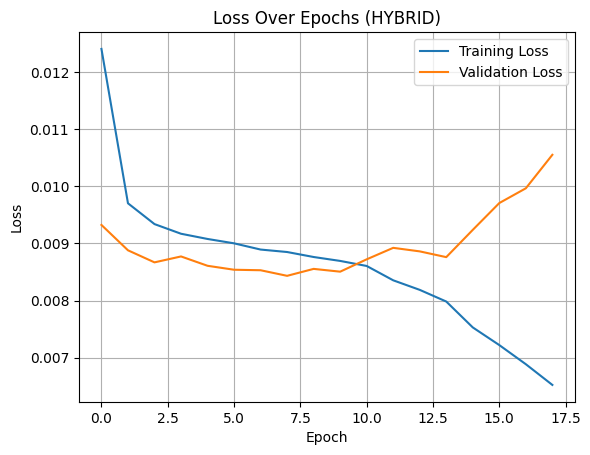

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


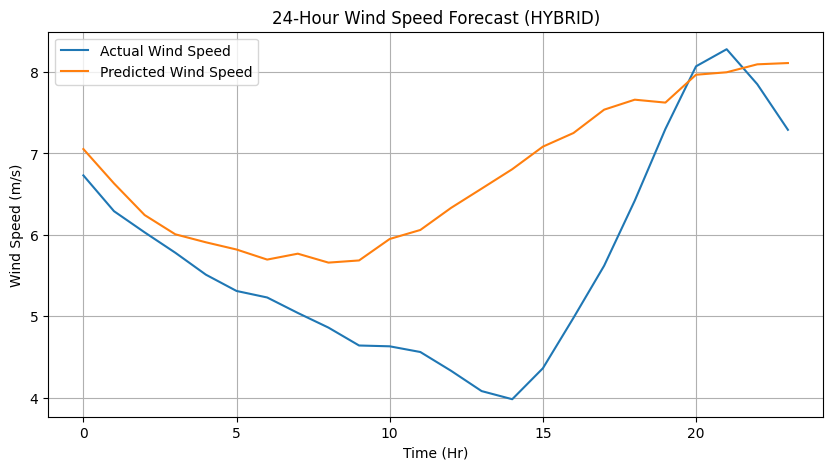

*Actual Wind Speed data from 2024-12-03 00:00:00
RMSE: 3.20 m/s
MPE: -16.23%


In [4]:
#HYBRID(CNN-LSTM) MODEL
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten, MaxPooling1D, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

df=pd.read_csv('CapeCodWind.csv', skiprows=8,header=1)
df_final=df.copy()
df_final['Time Stamp'] = pd.to_datetime(
    df[['YEAR', 'MO', 'DY', 'HR']].rename(
        columns={'YEAR': 'Year', 'MO': 'Month', 'DY': 'Day', 'HR': 'Hour'}))
df_final= df_final.drop(columns=['YEAR','MO','DY','HR'])
df_final.rename(columns={'WS50M': 'Wind Speed'}, inplace=True)
df_final=df_final.set_index('Time Stamp')

def add_cyclical_features(df):
    df['Hour_sin'] = np.sin(2 * np.pi * df.index.hour / 24)
    df['Hour_cos'] = np.cos(2 * np.pi * df.index.hour / 24)
    df['Month_sin'] = np.sin(2 * np.pi * df.index.month / 12)
    df['Month_cos'] = np.cos(2 * np.pi * df.index.month / 12)
    return df
df_final = add_cyclical_features(df_final)
features = ['Wind Speed', 'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos']

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_final[features])
data = scaled_features

early_stop = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

def sequence(data, window, forecast):
    x, y = [], []
    for i in range(len(data) - window - forecast + 1):
        x.append(data[i:i+window])
        y.append(data[i+window:i+window+forecast,0])
    return np.array(x), np.array(y)
window = 24*3
forecast = 24
x, y = sequence(data, window, forecast)

n_test = 30 * 24 #Data sizes to train model
x_train, x_test = x[:-n_test], x[-n_test:]
y_train, y_test = y[:-n_test], y[-n_test:]
x_train = x_train.reshape((-1, window, len(features)))
x_test = x_test.reshape((-1, window, len(features)))

model_HYBRID = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu',
           input_shape=(window, len(features))),
    MaxPooling1D(pool_size=2),

    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(forecast)
])

model_HYBRID.compile(optimizer='adam', loss='mse')
model_HYBRID.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
history_HYBRID = model_HYBRID.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, lr_scheduler]
)

plt.plot(history_HYBRID.history['loss'], label='Training Loss')
plt.plot(history_HYBRID.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (HYBRID)')
plt.legend()
plt.grid()
plt.show()

y_pred = model_HYBRID.predict(x_test)
dummy_array = np.zeros((y_pred.size, len(features)))
dummy_array[:, 0] = y_pred.flatten()
y_pred_originalHYBRID = scaler.inverse_transform(dummy_array)[:, 0].reshape(-1, forecast)
dummy_test = np.zeros((y_test.size, len(features)))
dummy_test[:, 0] = y_test.flatten()
y_test_originalHYBRID = scaler.inverse_transform(dummy_test)[:, 0].reshape(-1, forecast)
plt.figure(figsize=(10,5))
plt.plot(np.arange(forecast), y_test_originalHYBRID[0], label='Actual Wind Speed')
plt.plot(np.arange(forecast), y_pred_originalHYBRID[0], label='Predicted Wind Speed')

plt.xlabel('Time (Hr)')
plt.ylabel('Wind Speed (m/s)')
plt.title('24-Hour Wind Speed Forecast (HYBRID)')
plt.legend()
plt.grid()
plt.show()

rmse_HYBRID = (np.sqrt(mean_squared_error(y_test_originalHYBRID.flatten(),
                                   y_pred_originalHYBRID.flatten())))
mpe_HYBRID = (np.mean((y_test_originalHYBRID.flatten() - y_pred_originalHYBRID.flatten())
/ y_test_originalHYBRID.flatten()) * 100)

test_start_index = len(df_final) - len(y_test)
print(f'*Actual Wind Speed data from {df_final.index[test_start_index]}')
print(f'RMSE: {rmse_HYBRID:.2f} m/s')
print(f'MPE: {mpe_HYBRID:.2f}%')
